In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset, ensuring the path is correct
glass = pd.read_csv('./glass.csv')

# Separate features and target variable
X = glass.drop('Type', axis=1)
y = glass['Type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
a=[]
b=[]
# Decision tree with Gini index
for i in range(0,100000):
  #print("Iteration ",i)
  clf_gini = DecisionTreeClassifier(criterion="gini", random_state=i)
  clf_gini.fit(X_train, y_train)
  y_pred_gini = clf_gini.predict(X_test)
  #print("Accuracy with Gini Index:", metrics.accuracy_score(y_test, y_pred_gini))
  a.append(metrics.accuracy_score(y_test, y_pred_gini))
  # Decision tree with entropy
  clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=i)
  clf_entropy.fit(X_train, y_train)
  y_pred_entropy = clf_entropy.predict(X_test)
  #print("Accuracy with Entropy:", metrics.accuracy_score(y_test, y_pred_entropy))
  b.append(metrics.accuracy_score(y_test, y_pred_entropy))
print(max(a),a.index(max(a)))
print(max(b),b.index(max(b)))

0.7846153846153846 3755
0.7230769230769231 41


First few rows of the dataset:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Column names in the dataset:
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


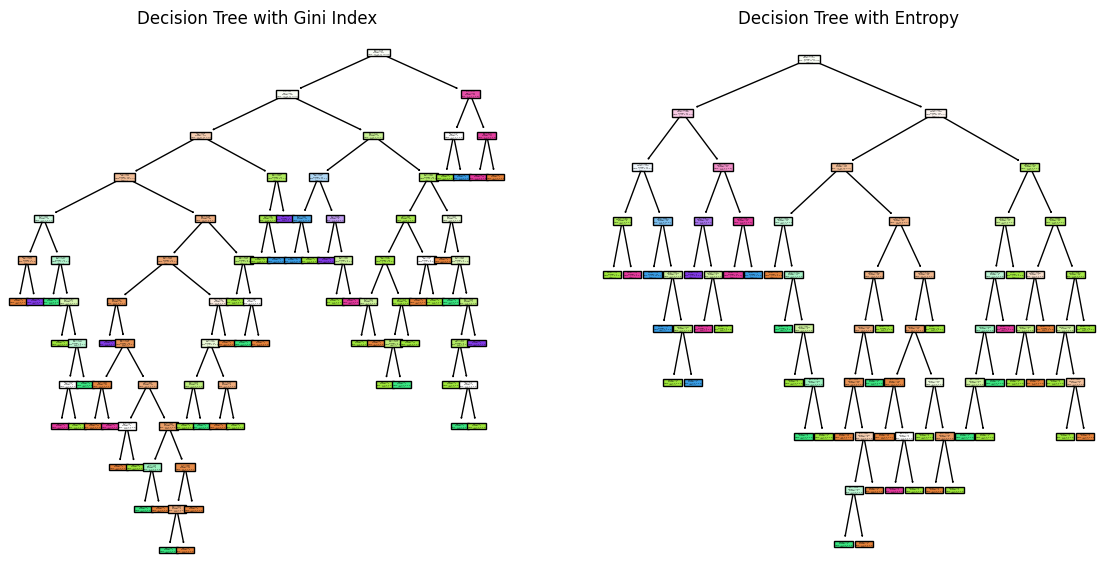

In [ ]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
# Replace with the actual path to your downloaded file
df = pd.read_csv('./glass.csv')

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(df.head())

# Check for column names to identify the target column
print("\nColumn names in the dataset:")
print(df.columns)

# Assuming the target column is named 'Type'
# Features and target
X = df.drop(columns=['Type'])  # Drop the target column to get features
y = df['Type']  # Target column

# Create Decision Tree Classifier with Gini Index
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_gini.fit(X, y)

# Create Decision Tree Classifier with Entropy
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_entropy.fit(X, y)

# Plot the trees
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Plot Gini Index Tree
plot_tree(tree_gini, feature_names=X.columns, class_names=[str(cls) for cls in tree_gini.classes_], filled=True, ax=axes[0])
axes[0].set_title('Decision Tree with Gini Index')

# Plot Entropy Tree
plot_tree(tree_entropy, feature_names=X.columns, class_names=[str(cls) for cls in tree_entropy.classes_], filled=True, ax=axes[1])
axes[1].set_title('Decision Tree with Entropy')

plt.show()
